# Timecard Traffic (Web Request Count) Prediction
### Using Holt-Winters (Triple Exponential Smoothing - TES) - Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv("Timecard-Traffic-2019-Daily.csv",sep=';',index_col='Timestamp', parse_dates=True)

In [7]:
df.head()


,WebRequestCount
Timestamp,
2019-01-01,26152.0
2019-01-02,484931.0
2019-01-03,215117.0
2019-01-04,694924.0
2019-01-05,27401.0


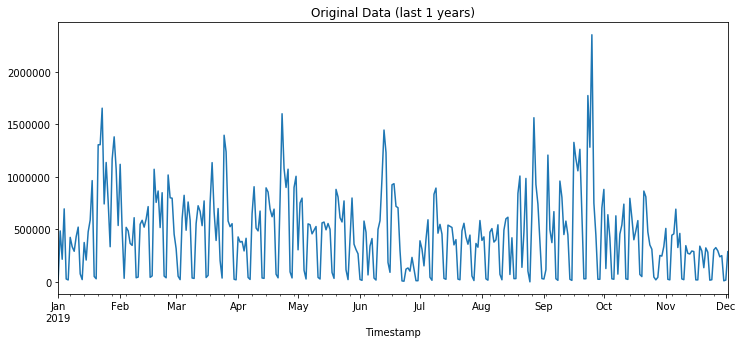

In [8]:
df = df.asfreq('D')
df.index
df['WebRequestCount'].plot(figsize=(12,5),title='Original Data (last 1 years)')

## Test Train Split & Fit

In [9]:
train_data = df['2019-01-01':'2019-10-31'] # excluding 1104: Indexing rule for slicing
test_data  = df['2019-11-01':'2019-11-30']

In [12]:
print("Number of data points in Training set is {0}, and Number of data points in Test set length is {1} ".format(len(train_data),len(test_data))) 


Number of data points in Training set is 304, and Number of data points in Test set length is 30 


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
model_type='add' #'add' or 'mul'
fitted_model=ExponentialSmoothing(train_data['WebRequestCount'],trend=model_type,seasonal=model_type,seasonal_periods=7).fit()

## Predict on test set

In [15]:
test_prediction = fitted_model.forecast(30)

## Evaluate on test set

In [16]:
# Mean ABS ERROR (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data,test_prediction)

# MSE : Mean Squared Error
mean_squared_error(test_data,test_prediction)
# ROOT MSE : RMSE
rmse = np.sqrt(mean_squared_error(test_data,test_prediction))

print(f'MAE is {mae}, RMSE of the data is {rmse}, while other info is as below:')

test_data.describe()


MAE is 157808.32264233747, RMSE of the data is 187327.52189233422, while other info is as below:


,WebRequestCount
count,30.000000
mean,243880.533333
std,178522.280430
min,9976.000000
25%,25324.500000
50%,285269.000000
75%,326704.500000
max,692158.000000


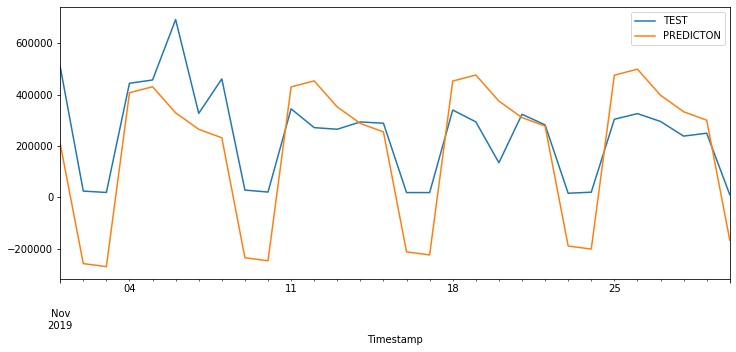

In [17]:
#train_data['WebRequestCount'].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data['WebRequestCount'].plot(legend=True,label='TEST',figsize=(12,5))
test_prediction.plot(legend=True,label='PREDICTON')

## Forecast in future

In [18]:
final_model = ExponentialSmoothing(df['WebRequestCount'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [19]:
number_of_days_in_future = 30
forecast_prediction = final_model.forecast(number_of_days_in_future)

## Plot the results

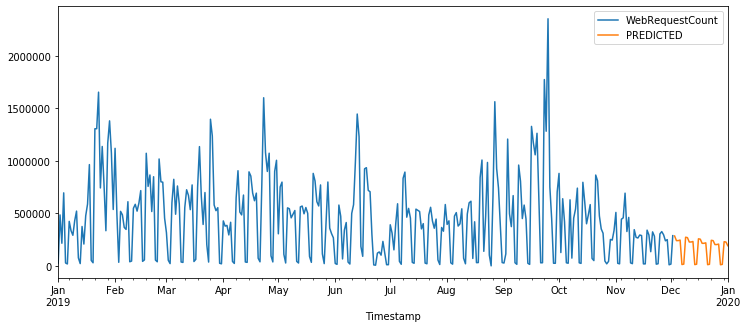

In [20]:
df.plot(figsize=(12,5),legend=True,label='ACTUAL')
forecast_prediction.plot(legend=True,label='PREDICTED')

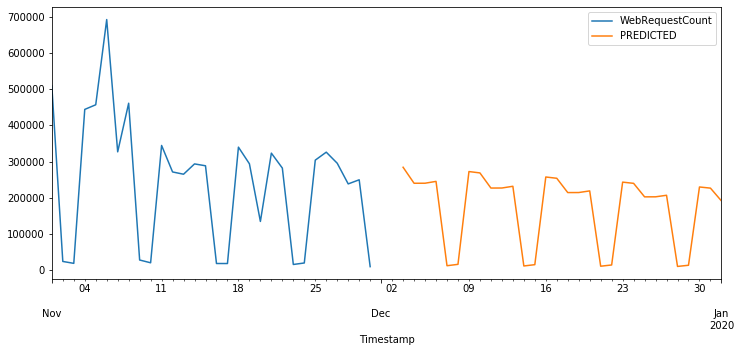

In [21]:
test_data.plot(figsize=(12,5),legend=True,label='ACTUAL')
forecast_prediction.plot(legend=True,label='PREDICTED')

In [22]:
## Daily Forecasted traffic count

In [23]:
forecast_prediction

2019-12-03    284395.872353
2019-12-04    240182.220774
2019-12-05    240299.528084
2019-12-06    245355.010300
2019-12-07     12517.816251
2019-12-08     16336.570478
2019-12-09    272490.011610
2019-12-10    268740.856125
2019-12-11    226961.014247
2019-12-12    227071.864193
2019-12-13    231849.059471
2019-12-14     11828.753449
2019-12-15     15437.298369
2019-12-16    257490.372135
2019-12-17    253947.594785
2019-12-18    214467.589741
2019-12-19    214572.337777
2019-12-20    219086.564860
2019-12-21     11177.621189
2019-12-22     14587.528101
2019-12-23    243316.411307
2019-12-24    239968.651686
2019-12-25    202661.885354
2019-12-26    202760.867371
2019-12-27    207026.601753
2019-12-28     10562.331523
2019-12-29     13784.534769
2019-12-30    229922.678353
2019-12-31    226759.201403
2020-01-01    191506.044457
Freq: D, dtype: float64